In [135]:
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 100, "display.max_columns", 300)


from sklearn.datasets import load_breast_cancer
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

le = preprocessing.LabelEncoder()
ohe = preprocessing.OneHotEncoder()

def plot_correlation_matrix(corr_mtrx):
    f = plt.figure(figsize=(8, 8))
    plt.matshow(corr_mtrx, fignum=f.number)
    plt.xticks(range(corr_mtrx.shape[1]), fontsize=9, rotation=45)
    plt.yticks(range(corr_mtrx.shape[1]), fontsize=9)
    cb = plt.colorbar()
    plt.title('Correlation Matrix', fontsize=10)

def correlation_matrix(x):
    result = abs(np.corrcoef(X.T))
    return result

def one_hot_en(X, head_lst):
    for head in head_lst:
        A = pd.get_dummies(X.loc[:,head],
                       prefix=head,drop_first=True)
        X = X.drop(head, axis=1)
        X = pd.concat([X, A], axis=1)
    return X

def delete_corr(x, value=0.5):
    corr_matrix = abs(np.corrcoef(x.T))
    m = corr_matrix * np.tri(*corr_matrix.shape, -1)
    ind = np.unique(np.argwhere(m > value)[:, 0])
    x = np.delete(x, ind, axis=1)
    return x, ind, abs(np.corrcoef(x.T))

def plot_correlation_matrix(corr_mtrx):
    f = plt.figure(figsize=(8, 8))
    plt.matshow(corr_mtrx, fignum=f.number)
    plt.xticks(range(corr_mtrx.shape[1]), fontsize=9, rotation=45)
    plt.yticks(range(corr_mtrx.shape[1]), fontsize=9)
    cb = plt.colorbar()
    plt.title('Correlation Matrix', fontsize=10)

def label_en(X, head_lst):
    for head in head_lst:
        X.loc[:,head] = le.fit_transform(X.loc[:,head])
    return X

def fill_na(X, str_headers=[]):
    '''Заполнение NaN-ов. Надо передать список head-еров, которые имеют строковые элементы'''
    for head in str_headers:
        X.loc[:, head] = X.loc[:, head].fillna(value='nan')
    for head in list(X.columns):
        if head not in str_headers:
            X.loc[:, head] = X.loc[:, head].fillna(value=X.loc[:, head].mean())
    return X

def clf_scorer(X_train, X_test, Y_train, Y_test, clf, head):
    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot()
    # ax2 = fig.add_subplot(222)
    
    for i in range(len(clf)):
        clf[i].fit(X_train, y_train)
        prediction = clf[i].predict(X_test)
        print(head[i], '\n\n')
        print('Accuracy score: ', sklearn.metrics.accuracy_score(Y_test, prediction))
        print('ROC AUC score: ', sklearn.metrics.roc_auc_score(Y_test, prediction))
        print('f1 score: ', sklearn.metrics.f1_score(Y_test, prediction))
        print('Recall score: ', sklearn.metrics.recall_score(Y_test, prediction))
        print('Precision score: ', sklearn.metrics.precision_score(Y_test, prediction))
        sklearn.metrics.plot_roc_curve(clf[i], X_test, y_test, ax=ax1);
        #sklearn.metrics.plot_confusion_matrix(clf[i], X_test, y_test);
        print('\n\n')
    #ax2.title('Confusion Matrix')
    plt.show()
    
    


In [136]:
random_state = 42
data = pd.read_csv('weatherAUS.csv')
y = data['RainTomorrow']
X = data.drop('RainTomorrow', axis=1)
y = le.fit_transform(y)
X = fill_na(X, ['Date','Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])
X[100000:100100]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
100000,2009-01-25,Nuriootpa,10.7000,32.900000,0.0,9.400000,13.100000,SE,26.000000,ENE,WSW,15.0,13.0,54.0,13.0,1017.4,1016.0,0.000000,0.000000,17.7,30.9,No,0.0
100001,2009-01-26,Nuriootpa,13.7000,33.900000,0.0,9.800000,13.200000,SE,39.000000,E,ESE,20.0,17.0,49.0,16.0,1019.8,1016.9,0.000000,0.000000,20.1,31.2,No,0.0
100002,2009-01-27,Nuriootpa,16.1000,41.700000,0.0,11.400000,12.200000,NE,31.000000,NE,NNW,13.0,11.0,20.0,5.0,1014.8,1010.7,1.000000,3.000000,29.9,40.0,No,0.0
100003,2009-01-28,Nuriootpa,21.1000,44.100000,0.0,15.200000,11.600000,N,70.000000,NNE,NW,19.0,17.0,11.0,8.0,1009.2,1006.6,2.000000,6.000000,35.8,41.8,No,0.0
100004,2009-01-29,Nuriootpa,26.9000,42.500000,0.0,15.200000,10.900000,NW,48.000000,NNW,N,15.0,15.0,17.0,9.0,1010.7,1008.5,3.000000,3.000000,34.9,41.4,No,0.0
100005,2009-01-30,Nuriootpa,22.0000,41.900000,0.0,14.800000,12.700000,NNW,54.000000,N,NNE,9.0,15.0,19.0,9.0,1011.4,1008.6,2.000000,3.000000,34.4,40.4,No,0.0
100006,2009-01-31,Nuriootpa,23.1000,41.000000,0.0,14.900000,9.800000,SE,59.000000,NE,SSE,9.0,13.0,30.0,11.0,1012.9,1010.3,6.000000,6.000000,31.7,41.0,No,0.0
100007,2009-02-01,Nuriootpa,23.2000,39.800000,0.0,14.800000,7.100000,ESE,54.000000,ENE,WSW,15.0,11.0,45.0,17.0,1013.7,1010.6,7.000000,6.000000,25.9,38.0,No,0.6
100008,2009-02-02,Nuriootpa,24.9000,37.400000,0.6,11.800000,9.100000,SSE,52.000000,ESE,SE,19.0,26.0,33.0,22.0,1011.7,1009.7,7.000000,4.000000,28.8,35.0,No,0.0
100009,2009-02-03,Nuriootpa,18.2000,37.700000,0.0,12.000000,12.600000,WSW,31.000000,E,SE,15.0,11.0,52.0,24.0,1010.8,1007.5,3.000000,3.000000,25.3,35.3,No,0.0


### Обработка категориальных признаков

Был выбран label encoder, т.к. в данной ситуации он дает лучшие результаты, чем one hot encoder

In [137]:
X.loc[:,'Date'] = le.fit_transform(X.loc[:,'Date'])
#X = one_hot_en(X, ['WindGustDir', 'Location', 'WindDir9am', 'WindDir3pm', 'RainToday'])
X = label_en(X, ['WindGustDir', 'Location', 'WindDir9am', 'WindDir3pm', 'RainToday'])
X

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,396,2,13.4,22.9,0.6,5.469824,7.624853,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0,0.0
1,397,2,7.4,25.1,0.0,5.469824,7.624853,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0,0.0
2,398,2,12.9,25.7,0.0,5.469824,7.624853,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0,0.0
3,399,2,9.2,28.0,0.0,5.469824,7.624853,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0,1.0
4,400,2,17.5,32.3,1.0,5.469824,7.624853,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3430,41,3.5,21.8,0.0,5.469824,7.624853,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,0,0.0
142189,3431,41,2.8,23.4,0.0,5.469824,7.624853,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,0,0.0
142190,3432,41,3.6,25.3,0.0,5.469824,7.624853,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,0,0.0
142191,3433,41,5.4,26.9,0.0,5.469824,7.624853,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,0,0.0


In [138]:
scale = sklearn.preprocessing.MinMaxScaler()
X1 = scale.fit_transform(X)

In [139]:
X1, ind, M = delete_corr(X1, value=0.5)
X1 = pd.DataFrame(X1, columns=np.delete(np.array(X.columns.values), ind))
X1

,Date,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,Humidity9am,Pressure9am,RainToday,RISK_MM
0,0.115284,0.041667,0.516509,0.001617,0.037723,0.525852,0.8125,0.294574,0.8125,0.71,0.449587,0.0,0.000000
1,0.115575,0.041667,0.375000,0.000000,0.037723,0.525852,0.8750,0.294574,0.3750,0.44,0.497521,0.0,0.000000
2,0.115866,0.041667,0.504717,0.000000,0.037723,0.525852,0.9375,0.310078,0.8125,0.38,0.447934,0.0,0.000000
3,0.116157,0.041667,0.417453,0.000000,0.037723,0.525852,0.2500,0.139535,0.5625,0.45,0.613223,0.0,0.002695
4,0.116448,0.041667,0.613208,0.002695,0.037723,0.525852,0.8125,0.271318,0.0625,0.82,0.500826,0.0,0.000539
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0.998544,0.854167,0.283019,0.000000,0.037723,0.525852,0.0000,0.193798,0.1250,0.59,0.730579,0.0,0.000000
142189,0.998836,0.854167,0.266509,0.000000,0.037723,0.525852,0.0000,0.193798,0.5625,0.51,0.728926,0.0,0.000000
142190,0.999127,0.854167,0.285377,0.000000,0.037723,0.525852,0.3750,0.124031,0.5625,0.56,0.710744,0.0,0.000000
142191,0.999418,0.854167,0.327830,0.000000,0.037723,0.525852,0.1875,0.240310,0.5625,0.53,0.669421,0.0,0.000000


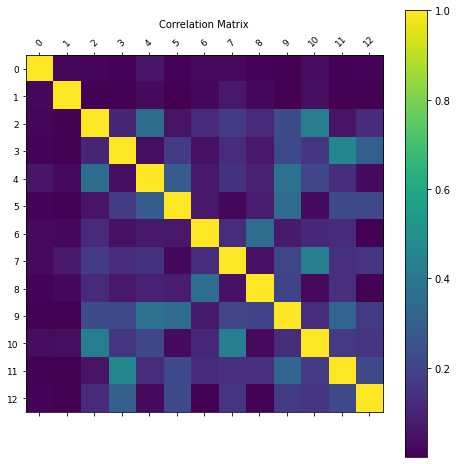

In [140]:
M.shape
plot_correlation_matrix(M)

(106644, 13) (106644,)


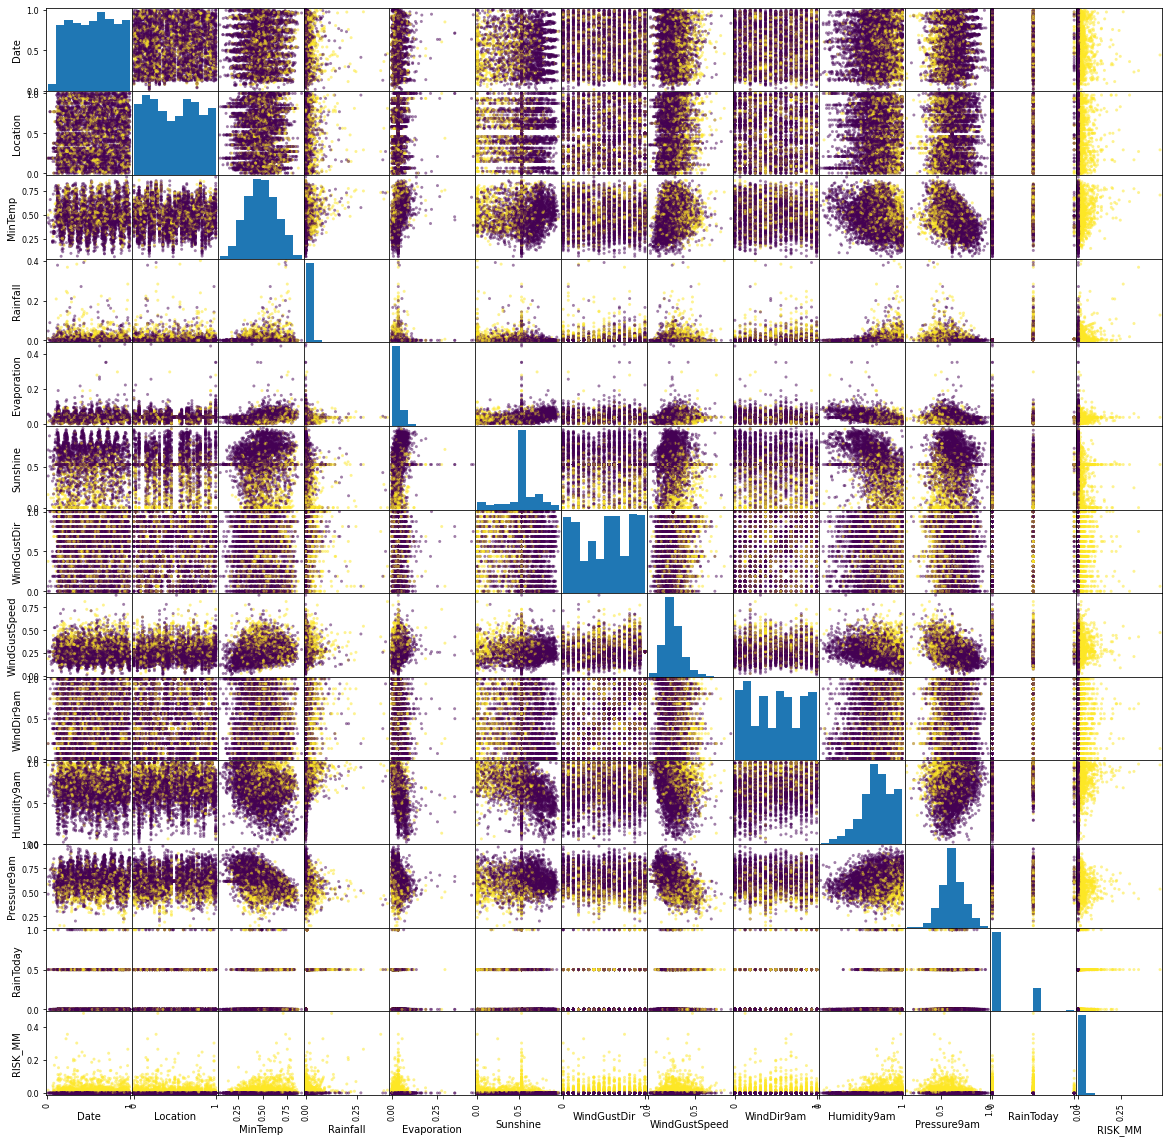

In [141]:
# работает долго
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X1, y, test_size=0.25, random_state=23)
print(X_train.shape, y_train.shape)
pd.plotting.scatter_matrix(X_train[:5000], c=y_train[:5000], figsize=(20, 20));

Видно, что разделение по большей части обеспечивается признаком RISK_MM

(106644, 13)
Naive Bayes classifier for multivariate Bernoulli models 


Accuracy score:  0.8422177839039073
ROC AUC score:  0.7676372455841719
f1 score:  0.6396865163486862
Recall score:  0.6340252132942824
Precision score:  0.6454498314752398



Naive Bayes classifier for multinomial models 


Accuracy score:  0.7833413035528426
ROC AUC score:  0.5096141601935567
f1 score:  0.03773113443278361
Recall score:  0.019228320387113206
Precision score:  1.0



Gaussian Naive Bayes 


Accuracy score:  0.9647810064980731
ROC AUC score:  0.9773974581166955
f1 score:  0.9261705389786532
Recall score:  1.0
Precision score:  0.8624931356397584





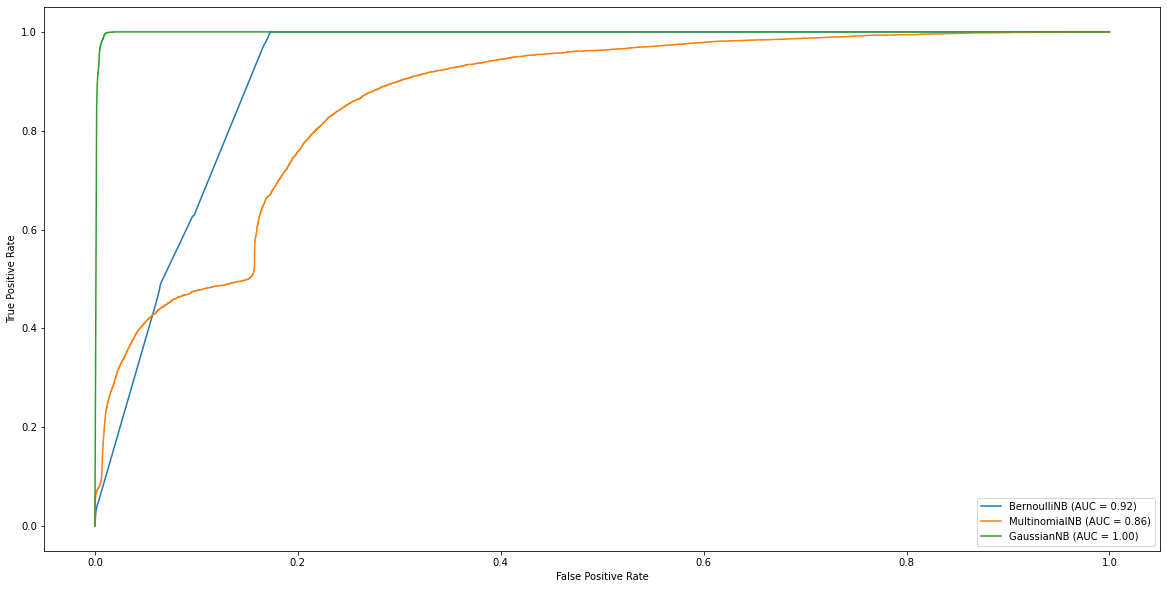

In [142]:
from sklearn.naive_bayes import *
clf_lst = [BernoulliNB(), MultinomialNB(), GaussianNB()]
head_lst = ['Naive Bayes classifier for multivariate Bernoulli models',
           'Naive Bayes classifier for multinomial models',
           'Gaussian Naive Bayes']
print(X_train.shape)
clf_scorer(X_train, X_test, y_train, y_test, clf_lst, head_lst)

Classifier implementing the 1-nearest neighbors vote 


Accuracy score:  0.7773214436411714
ROC AUC score:  0.6687851816851574
f1 score:  0.4848366523493427
Recall score:  0.4743410161721635
Precision score:  0.49580726740316783



Classifier implementing the 4-nearest neighbors vote 


Accuracy score:  0.8158597991504684
ROC AUC score:  0.6409218401523429
f1 score:  0.44003421727972625
Recall score:  0.32751814593149114
Precision score:  0.6703153505342716



Classifier implementing the 7-nearest neighbors vote 


Accuracy score:  0.8204168893639765
ROC AUC score:  0.6786520583706545
f1 score:  0.5109544967059905
Recall score:  0.42467846682796384
Precision score:  0.6412228417611998





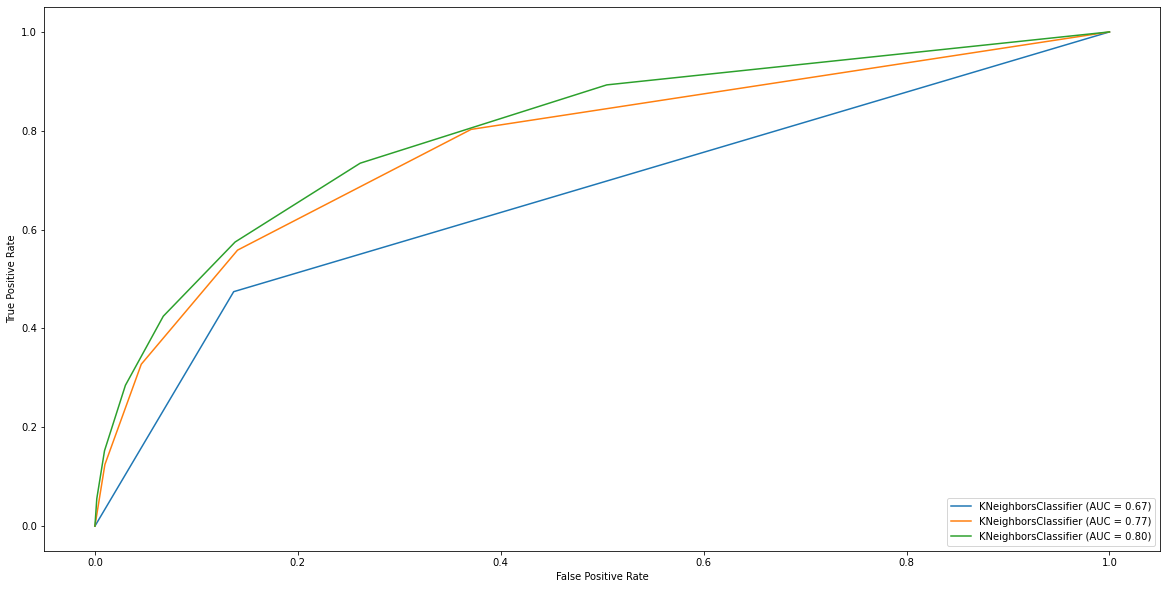

In [143]:
# работает ооооочень долго, лучше не запускать
clf_lst = []
head_lst = []
for i in range(1, 10, 3):
    clf_lst.append(sklearn.neighbors.KNeighborsClassifier(n_neighbors=i))
    head_lst.append(f'Classifier implementing the {i}-nearest neighbors vote')
clf_scorer(X_train, X_test, y_train, y_test, clf_lst, head_lst)

Logistic Regression classifier 


Accuracy score:  0.8984500267236771
ROC AUC score:  0.7866191944035488
f1 score:  0.7183647995007022
Recall score:  0.5862727620017828
Precision score:  0.9272910372608257





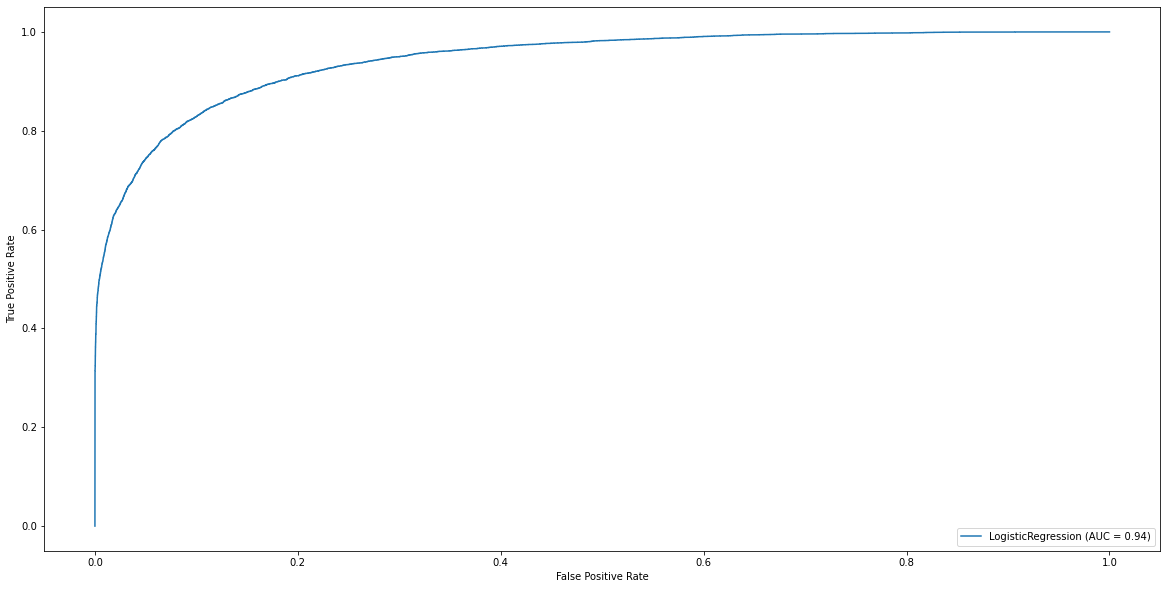

In [144]:
clf_lst = [sklearn.linear_model.LogisticRegression(max_iter=1e4)]
head_lst = ['Logistic Regression classifier']
clf_scorer(X_train, X_test, y_train, y_test, clf_lst, head_lst)

#### Выводы

* Лучшие результаты получил, используя Гуссовый классификатор из Байесовских
* Результаты при преобразовании категориальных признаков через label encoder, чем через one hot
* Самые неудовлетворительные результаты получаются при использовании метода k ближайших соседий (плохие метрики, низкая скорость работы)

In [151]:
# Все, что ниже, это тестирование метрик из part 2.2 и к данному заданию не относится

In [146]:
f = open('HW2_labels.txt', 'r')
lines = f.readlines()
f.close()
data = np.array([[]])
for line in lines:
    line = line[:-1]
    data = np.append(data, np.array(line.split(',')).astype(float))
data = data.reshape(30000, 3)
X = pd.DataFrame(data[:, :2], columns=['A', 'B'])
y = data[:, 2]
X

,A,B
0,0.983528,0.016472
1,0.788912,0.211088
2,0.328336,0.671664
3,0.863752,0.136248
4,0.610670,0.389330
...,...,...
29995,0.979642,0.020358
29996,0.929191,0.070809
29997,0.035188,0.964812
29998,0.334585,0.665415


In [147]:
def confusion_stats(y_true, y_predict):
    FP = y_predict > y_true
    FN = y_predict < y_true
    TP = y_predict.astype(bool) & y_true.astype(bool)
    TN = np.logical_not(y_predict.astype(bool)) & np.logical_not(y_true.astype(bool))
    return {'TP': np.sum(TP), 'TN': np.sum(TN), 'FP': np.sum(FP), 'FN': np.sum(FN)}

def precision(y_true, y_predict):
    cs = confusion_stats(y_true, y_predict)
    summ = cs['TP'] + cs['FP']
    if summ == 0:
        return 1
    return cs['TP'] / summ

def recall(y_true, y_predict):
    cs = confusion_stats(y_true, y_predict)
    return cs['TP'] / (cs['TP'] + cs['FN'])    

def accuracy(y_true, y_predict):
    cs = confusion_stats(y_true, y_predict)
    return (cs['TP'] + cs['TN']) / (cs['TP'] + cs['TN'] + cs['FN'] + cs['FP'])

def f1(y_true, y_predict):
    rec = recall(y_true, y_predict)
    prec = precision(y_true, y_predict)
    return 2 * (rec * prec) / ([prec + rec])

def lift(y_true, y_predict):
    num = precision(y_true, y_predict)
    cs = confusion_stats(y_true, y_predict)
    denum = (cs['TP'] + cs['FN']) / (cs['TP'] + cs['TN'] + cs['FN'] + cs['FP'])
    return num/denum

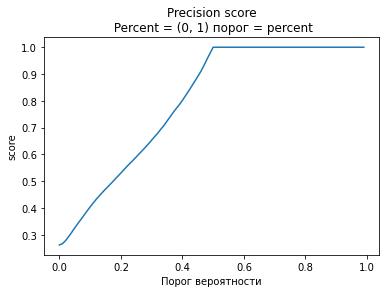

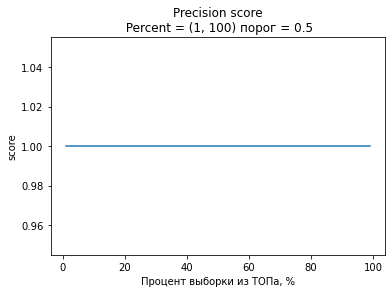

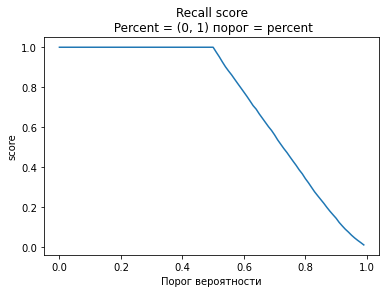

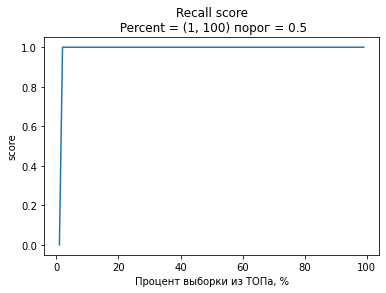

In [148]:
def score(y_true, y_predict, percent=None, function=accuracy):
    y_true = np.array(y_true)
    y_predict = np.array(y_predict)
    if percent is None:
        y_predict = (y_predict[:, 1] >= 0.5).astype(float)
        return function(y_true, y_predict)
    percent = abs(percent)
    assert percent <= 100, 'percent > 100'
    if percent <= 1:
        y_predict = (y_predict[:, 1] >= percent).astype(float)
        return function(y_true, y_predict)
    if percent > 1:
        ind = np.argsort(y_predict[:, 1])[::-1]
        y_predict = np.take_along_axis(y_predict[:, 1], ind, axis=0)
        y_predict = (y_predict >= 0.5).astype(float)
        y_true = np.take_along_axis(y_true, ind, axis=0)
        n = int(len(y_true) * percent / 100)
        return function(y_true[:n], y_predict[:n])


def plot_score(func, header='Some score'):
    sc = []
    x = np.arange(0, 1, 0.01)
    for per in x:
        sc.append(score(y, X, percent=per, function=func))
    plt.plot(x, sc)
    plt.title(header + '\n Percent = (0, 1) порог = percent')
    plt.ylabel('score')
    plt.xlabel('Порог вероятности')
    plt.show()
    plt.clf()

    sc = []
    x = np.arange(1, 100)
    for per in x:
        sc.append(score(y, X, percent=per, function=func))
    plt.plot(x, sc)
    plt.title(header + '\n Percent = (1, 100) порог = 0.5')
    plt.ylabel('score')
    plt.xlabel('Процент выборки из ТОПа, %')
    plt.show()
plot_score(precision, header='Precision score')
plot_score(recall, header='Recall score')


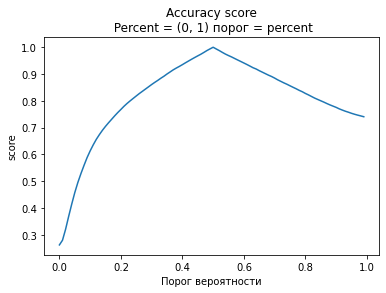

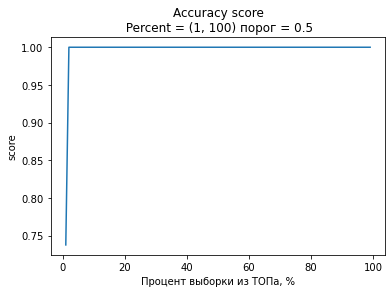

In [149]:
plot_score(accuracy, header='Accuracy score')

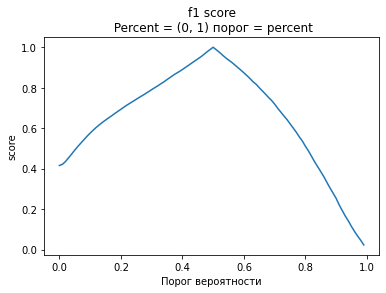

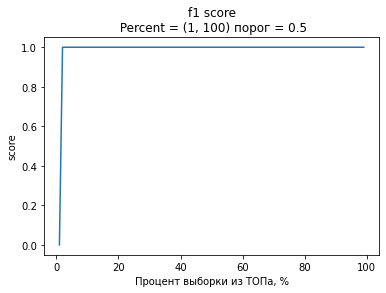

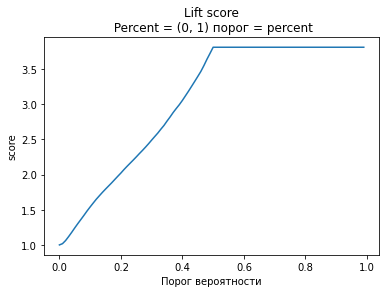

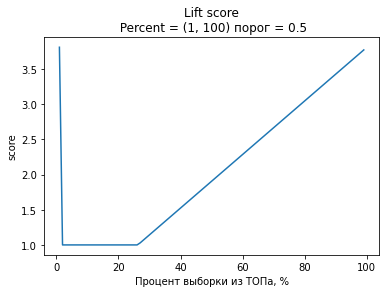

In [150]:
plot_score(f1, header='f1 score')
plot_score(lift, header='Lift score')